In [1]:
import os
os.environ["KAGGLE_USERNAME"]="reviewc7"
os.environ["KAGGLE_KEY"]="483139e1b10d7096045ca1c60488c56b"

In [2]:
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import collections

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [3]:
!kaggle datasets download farjanakabirsamanta/osteoarthritis-prediction

 83% 89.0M/107M [00:01<00:00, 99.1MB/s]
100% 107M/107M [00:01<00:00, 97.0MB/s] 


In [4]:
!unzip osteoarthritis-prediction.zip

Archive:  osteoarthritis-prediction.zip
  inflating: Valid/Valid/Normal/9001695L.png  
  inflating: Valid/Valid/Normal/9001897L.png  
  inflating: Valid/Valid/Normal/9003126L.png  
  inflating: Valid/Valid/Normal/9003126R.png  
  inflating: Valid/Valid/Normal/9003430L.png  
  inflating: Valid/Valid/Normal/9003658L.png  
  inflating: Valid/Valid/Normal/9003658R.png  
  inflating: Valid/Valid/Normal/9004315L.png  
  inflating: Valid/Valid/Normal/9004315R.png  
  inflating: Valid/Valid/Normal/9004669L.png  
  inflating: Valid/Valid/Normal/9004669R.png  
  inflating: Valid/Valid/Normal/9005075L.png  
  inflating: Valid/Valid/Normal/9005075R.png  
  inflating: Valid/Valid/Normal/9005321L.png  
  inflating: Valid/Valid/Normal/9005321R.png  
  inflating: Valid/Valid/Normal/9005656L.png  
  inflating: Valid/Valid/Normal/9005656R.png  
  inflating: Valid/Valid/Normal/9007904L.png  
  inflating: Valid/Valid/Normal/9007904R.png  
  inflating: Valid/Valid/Normal/9008820L.png  
  inflating: Valid/V

In [5]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
# Define directories for training, validation, and test data
train_dir = "/content/train/train"
validation_dir = "/content/Valid/Valid"
test_dir = "/content/test"

# Initialize image data generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


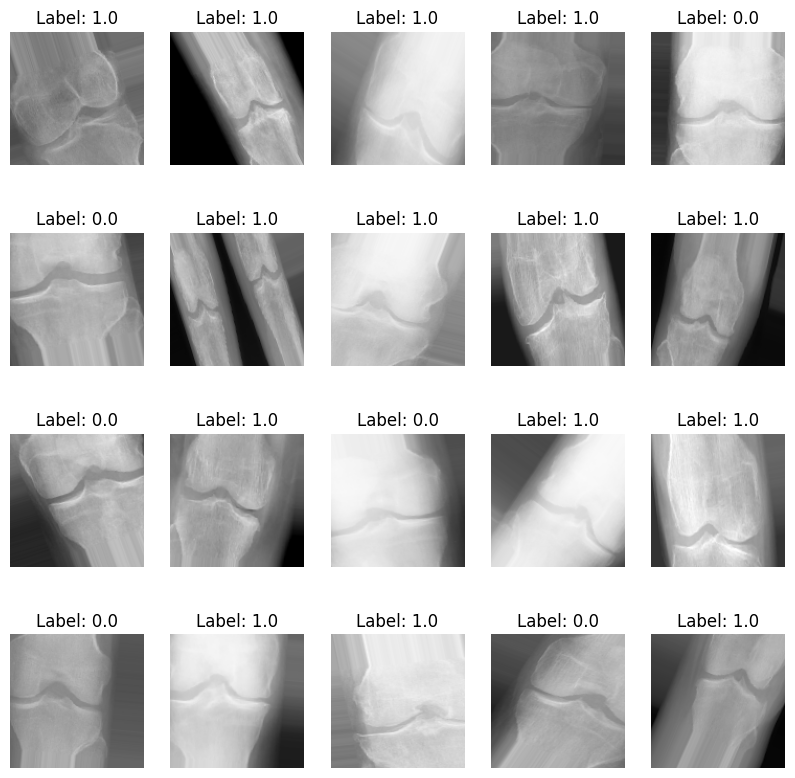

In [7]:
# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Display the first few images and their labels
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i])
    plt.title("Label: {}".format(labels[i]))
    plt.axis('off')
plt.show()

In [8]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import optimizers

# Load InceptionV3 pre-trained model
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(128, 128, 3))

# Create a sequential model
model = models.Sequential()

# Add the pre-trained InceptionV3 base to the model
model.add(conv_base)

# Flatten the output of the InceptionV3 base
model.add(layers.Flatten())

# Add a densely connected layer with ReLU activation
model.add(layers.Dense(256, activation='relu'))

# Add a final output layer with sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))
# Print model summary
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23900449 (91.17 MB)
Trainable params: 23866017 (91.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [9]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

# Define a model checkpoint callback to save the best model during training
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=13,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=2)


Epoch 1/50
13/13 [==============================] - 33s 324ms/step - loss: 0.6427 - acc: 0.6346 - val_loss: 0.9486 - val_acc: 0.6000
Epoch 2/50
13/13 [==============================] - 5s 412ms/step - loss: 0.5984 - acc: 0.6760 - val_loss: 0.9262 - val_acc: 0.7000
Epoch 3/50
13/13 [==============================] - 2s 150ms/step - loss: 0.6309 - acc: 0.6346 - val_loss: 0.7182 - val_acc: 0.7000
Epoch 4/50
13/13 [==============================] - 2s 152ms/step - loss: 0.5871 - acc: 0.6538 - val_loss: 0.6247 - val_acc: 0.7250
Epoch 5/50
13/13 [==============================] - 3s 240ms/step - loss: 0.5715 - acc: 0.6769 - val_loss: 0.6926 - val_acc: 0.6500
Epoch 6/50
13/13 [==============================] - 2s 147ms/step - loss: 0.5734 - acc: 0.6962 - val_loss: 0.5532 - val_acc: 0.7500
Epoch 7/50
13/13 [==============================] - 2s 142ms/step - loss: 0.5829 - acc: 0.6840 - val_loss: 0.6311 - val_acc: 0.6000
Epoch 8/50
13/13 [==============================] - 2s 155ms/step - loss: 0

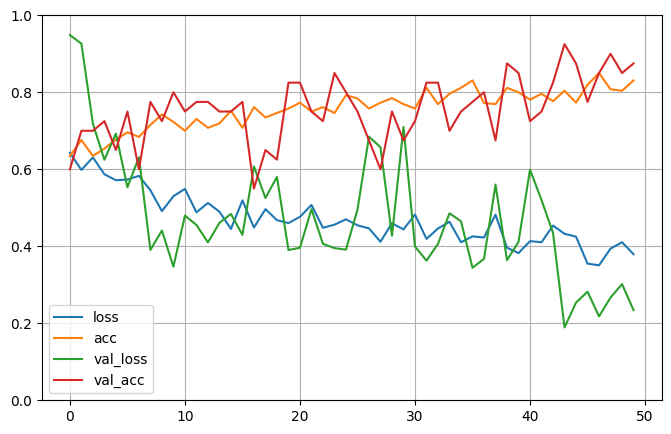

Accuracy: 0.8307692408561707


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to knee_osteoarthritis_model.h5


In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

accuracy = history.history['acc'][-1]
print("Accuracy:", accuracy)


# Define the file path where you want to save the model
model_file_path = 'knee_osteoarthritis_model.h5'

# Save the model
model.save(model_file_path)

print("Model saved to", model_file_path)

In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("knee_osteoarthritis_model.h5")

# Make predictions on user input images
def predict_knee_image(user_image_path):
    user_image = image.load_img(user_image_path, target_size=(128, 128))

    # Preprocess the image
    user_image = image.img_to_array(user_image)
    user_image = np.expand_dims(user_image, axis=0)
    user_image = user_image / 255.0  # Rescale to [0, 1] as done during training

    # Make predictions using the loaded model
    prediction = model.predict(user_image)
    predicted_class = int(np.round(prediction)[0][0])

    # Output the classification result
    if predicted_class == 0:
        print("Knee image is Normal")
    else:
        print("Knee image is Osteoarthritis")

# Example usage

user_image_path = "/content/test/test/Normal/9006723R.png"  # Replace with the actual path
predict_knee_image(user_image_path)
user_image_path = "/content/test/test/Osteoarthritis/ModerateG3 (127).png"  # Replace with the actual path
predict_knee_image(user_image_path)


1/1 [==============================] - 2s 2s/step
Knee image is Normal
1/1 [==============================] - 0s 30ms/step
Knee image is Osteoarthritis
